# Лабораторная работа № 3
## Метод k ближайших соседей

**Введение**

Метод ближайших соседей (k Nearest Neighbors, или kNN) — очень популярный метод классификации, используемый как в задачах классификации, та и регрессии. Это один из самых простых подходов к решению задачи обучения с учителем. На уровне интуиции суть метода такова: смотри на соседей, какие преобладают, таков и ты. Формально основой метода является гипотеза компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных. 

**Постановка задачи**

Дана обучающая выборка $X^l = (x_i, y_i)^l_{i=1},$ где $x_i \in X, y_i \in Y$ и функция расстояния ${ \rho: X \times X \rightarrow [0, \infty)}$. Требуется классифицировать новый объект $u$.
Для решения мы должны расположить объекты обучающей выборки в порядке возрастания расстояний до $u$: $${\rho(u, x^{(1)}_u) \leq \rho(u, x^{(2)}_u) \leq \ldots \leq \rho(u, x^{(l)}_u)},$$ где через ${x^{(i)}_u}$ обозначен $i$-й сосед объекта $u$. Алгоритм k ближайших соседей относит объект $u$ к тому классу, представителей которого окажется больше всего среди $k$
его ближайших соседей:$${a(u; X^l, k) = \underset{y \in Y}{\mathrm{arg max}} \sum\limits_{i=1}^n {w_i[y^{(i)}_u = y]}}.$$ Параметр $k$ настраивается обычно методом кросс-валидации. Веса $w_i$ предполагаются либо постоянными для $i=1, 2, \ldots, k$ (и тогда мы имеем классический метод k ближайших соседей), либо, в более общем случае, убывают по закону $w_i = K(\rho(u, x^{(i)}_u))$, где $K(x)$ - любая монотонно убывающая функция.

**Метод ближайших соседей в реальных задачах**
- В чистом виде kNN может послужить хорошим стартом (baseline) в решении какой-либо задачи;
- В соревнованиях Kaggle kNN часто используется для построения мета-признаков (прогноз kNN подается на вход прочим моделям) или в стекинге/блендинге;
- Идея ближайшего соседа расширяется и на другие задачи, например, в рекомендательных системах простым начальным решением может быть рекомендация какого-то товара (или услуги), популярного среди *ближайших соседей* человека, которому хотим сделать рекомендацию;
- На практике для больших выборок часто пользуются *приближенными* методами поиска ближайших соседей. В [лекции](https://www.youtube.com/watch?v=UUm4MOyVTnE) Артема Бабенко приведены примеры эффективных алгоритмов поиска ближайших соседей среди миллиардов объектов в пространствах высокой размерности (поиск по картинкам). Также известны открытые библиотеки, в которых реализованы такие алгоритмы, спасибо компании Spotify за ее библиотеку [Annoy](https://github.com/spotify/annoy).

**Качество классификации** методом ближайших соседей, как видно из формализации выше, зависит от следующих параметров:
 - число соседей;
 - метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). При использовании большинства метрик значения признаков надо нормировать. Например, признак "Зарплата" с диапазоном значений до 100 тысяч не должнен вносить больший вклад в расстояние, чем "Возраст" со значениями до 100; 
 - веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос").

**Плюсы метода ближайших соседей**
 
- Простая реализация;
- Можно адаптировать под нужную задачу выбором метрики или ядра (в двух словах: ядро может задавать операцию сходства для сложных объектов типа графов, а сам подход kNN остается тем же). Примеры эффективного применения kNN (в частности, "VideoLectures.Net Recommender System Challenge") можно, найти, например, на [сайте](http://alexanderdyakonov.narod.ru/contests.htm);
- Неплохая интерпретационная сила. Можно объяснить, почему тестовый пример был классифицирован именно так. Однако если число соседей большое, то интерпретация ухудшается (условно: "мы не дали ему кредит, потому что он похож на 1000 клиентов, из которых 120 – плохие, что на 15% больше, чем в среднем по выборке").
 
**Минусы метода ближайших соседей**

- Метод считается быстрым в сравнении, например, с композициями алгоритмов, но в реальных задачах, как правило, число соседей, используемых для классификации, будет большим (100-150), и в таком случае алгоритм будет работать медленно;
- Если в наборе данных много признаков, то трудно подобрать подходящие веса и определить, какие признаки не важны для классификации/регрессии;
- Зависимость от выбранной метрики расстояния между примерами. Выбор по умолчанию евклидового расстояния чаще всего ничем не обоснован. Можно отыскать хорошее решение перебором параметров, но для большого набора данных это отнимает много времени;
- Нет теоретических оснований выбора определенного числа соседей - только перебор (впрочем, чаще всего это верно для всех гиперпараметров всех моделей). В случае малого числа соседей метод чувствителен к выбросам, то есть склонен переобучаться;
- Как правило, плохо работает, когда признаков много, из-за "прояклятия размерности". Про это хорошо рассказывает известный в ML-сообществе профессор Pedro Domingos – [тут](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) в популярной статье "A Few Useful Things to Know about Machine Learning", также "the curse of dimensionality" описывается в книге Deep Learning в [главе](http://www.deeplearningbook.org/contents/ml.html) "Machine Learning basics".

**В данной лабораторной работе** мы восполльзуемся классическим методом kNN для решения двух задач классификации:
- на синтезированных данных
- на модельном наборе данных

## Простой модельный пример

**Задание 1.** Создайте два набора точек принадлежащих двумерным нормальным распределениям:
- с центром $(-1, 1)$ и матрицей ковариации $\begin{pmatrix} 1 & 1 \\ -1 & 1 \end{pmatrix}$;
- с центром $(1, -1)$ и  матрицей ковариации $\begin{pmatrix} 2 & -2 \\ 2 & 2 \end{pmatrix}$.

Количество точек в каждом наборе - 500. Постройте график с полученными точками, где принадлежность к набору будет обозначена определенным цветом. Подсказка: вам пригодится функция `numpy.random.multivariate_normal`

In [ ]:
# ваш код здесь

**Задание 2.** Подготовьте обучающую выборку и тестовые данные, считая, что первое распределение - это класс $0$, а второе - $1$. Обучающая выборка должна представлять собой массив X_train пар координат размером $1000 \times 2$ и массив меток классов ($0$ или $1$) размером $1000 \times 1$. Количество представителей обоих классов должно быть одинаковым - $500$.

Тестовая выборка X_test, y_test строится аналогично. Колличество образцов из первого и второго классов в ней - по 200 штук. Таким образом, размеры X_test - $400 \times 2$, y_test - $400 \times 1$

In [ ]:
# ваш код здесь

**Задание 3.** При помощи объекта `sklearn.neighbors.KNeighborsClassifier` постройте классический невзвешенный kNN-классификатор при k = 1. Получите массив предсказанных меток классов для тестового набора. Подсчитайте долю правильных ответов в тестовом наборе.

In [ ]:
# ваш код здесь

**Задание 4.** Познакомьтесь с функциями из модуля `sklearn.metrics`. Постройте матрицу рассеяния (confusion matrix) для ваших тестовых данных. Какую информацию она несет? Воспользуйтесь функцией `sklearn.metrics.plot_confusion_matrix` для того, чтобы визуализировать вашу матрицу рассеяния.

In [ ]:
# ваш код здесь

**Задание 5.** В модуле `sklearn.model_selection` расположены вспомогательные функции для проведения валидации. Основные способы разбиения обучающей выборки на непосредственно обучение и на валидацию следующие:

- Отложенная выборка `held-out/hold-out set`. При таком подходе мы оставляем какую-то долю обучающей выборки, от 20% до 40%, обучаем модель на остальных данных и считаем некоторую метрику качества модели, например долю правильных ответов в задаче классификации на отложенной выборке;
- Кроссвалидация `K-Fold`. Обучающая выборка разбивается на k частей. Последовательно каждая из них убирается из обучения, а после построения модели на ней производится проверка;
- Кроссвалидация `Leave-one-out`. Крайний случай `K-Fold`, когда один образец убирается, по остальным строится модель и проверяется на изъятом образце.

Используйте разбиение обучающей выбоки на обучение и валидацию для оценки единственного числового *гиперпараметра* модели - величины $k$ в методе kNN. Для этого постройте графики зависимости качества обучения (accuracy) методами `LOO` и `K-Fold` от $k$. Какое значение нужно выбрать для наилучшей классификации?

Используйте два варианта метода kNN - без взвешивания (или, по другому, с одинаковыми весами, `weights = 'uniform'`) и с весами, обратно пропорциональными расстоянию ${\rho(.,.)}$ (`weights = 'distance'`).

Проверьте, что величина accuracy является минимальной для полученного $k$ и на тестовом наборе.

In [ ]:
# ваш код здесь

**Задание 6.** постройте график с границами между классами (decision boundaries), которые получены методом kNN и точками обучающего множества. Вам понадобятся функции `matplotlib.pyplot.contourf` и `numpy.meshgrid`

In [ ]:
# ваш код здесь

## Работа с базой данных изображений CIFAR-10

Далее мы применим разработанный нами класс для классификации набора данных CIFAR-10. Он представляет собой два массива - обучающий и тестовый, содержащие 50000 и 10000 цветных трехканальных RGB изображений размером 32x32 пикселя. Колличество классов - 10. 

Набор данных можно скачать отсюда: https://www.cs.toronto.edu/~kriz/cifar.html Вам нужна "CIFAR-10 python version" (https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)

Архив содержит файлы с обучающими данными `data_batch_1`, `data_batch_2`, ..., `data_batch_5` и один файл с тестовыми данными `test_batch`. Каждый из них представляет собой "pickled"-объект, который создан при помощи библиотеки `pickle`. Она как правило применяется при необходимости загрузки/выгрузки объектов языка Питон в так называемом сериализованном виде (подробнее: https://docs.python.org/3/library/pickle.html). Функция, который позволит вам десериализовать каждый из файлов архива, выглядит следующим образом:

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# data_dictionary = unpickle('... path to pickle file ...')

Заггруженные при помощи функции `unpickle` данные содержат в себе объекты-словари со следующими ключами:
- `data` - массив numpy типа uint8 размером 10000x3072. Каждый ряд в нем содержит цветное RGB изображение размером 32x32 пикселя. Первые 1024 элемента - красный канал, вторые 1024 элемента - зеленый канал, а последние 1024 - синий канал соответственно. Значения записаны по рядам.
- `labels` - a список из 10000 чисел в диапазоне от 0 до 9. Число по i-му индексу - это номер метки класса i-го изображения в массиве `data`.

Также в архиве расположен файл `batches.meta`. Он также содержит сериализованный словарь. В этом словаре нас будет интересовать только один из ключей:
- `label_names` - список из 10 элементов, содержащий текстовые имена классов. К примеру, `label_names[0] == "airplane"`, `label_names[1] == "automobile"`, и т.д.

**Задание 7.** Вашей первой задачей будет выгрузить данные из архива. Вы должны получить 6 массивов и 6 списков. Первые пять из них нужно объединить в обучающую выборку размером 50000 элементов. Таким образом, в результате у вас должно остаться 4 numpy-массива: `X_train` и `y_train`, `X_test` и `y_test`. Также вам понадобятся метки классов, которые вы должны сохранить в список под названием `classes`.

In [ ]:
# ваш код здесь

Если вы все сделали правильно, то следующий код должен вывести таблицу с примерами 10 изображений каждого класса:

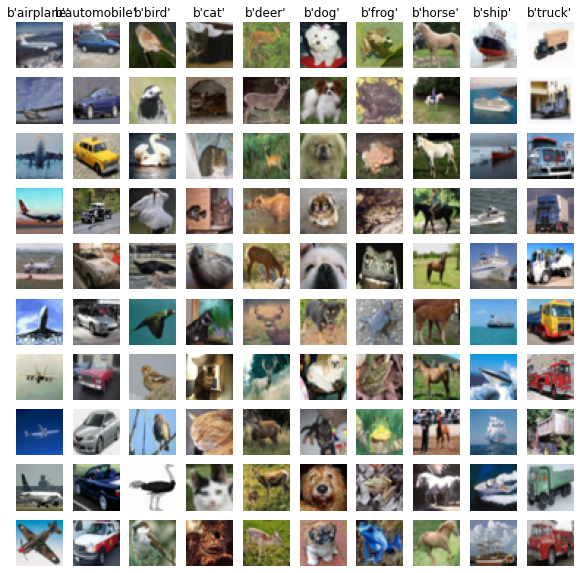

In [45]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

num_classes = len(classes)
samples_per_class = 10

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.array(y_train) == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

**Задание 8.** Обучение и тестирование на выборке размером 50000 и 10000 элементов сложно осуществить на обычном компьютере, поэтому для дальнейшей работы вам нужно выбрать из обучающей выборки первые 5000 примеров, а из тестовой выборки - первые 500.

Далее следует преобразовать полученные многомерные массивы X_train и X_test в двумерные размерами (5000x3072 и 500x3072), где по каждой i-й строке будет располагаться вектор признаков i-го изображения. В нашем случае преобразование в вектор признаков будет тривиальным. Вы должны данные из всех цветных каналов превратить из матриц в одну длинную строку. Проще всего это сделать при помощи функции `numpy.reshape`. Подсказка: обратите внимание, что она может принимать в качестве аргумента значение -1.

После преобразований выведите в консоль новые размеры X_train и X_test. Значения должны быть (5000L, 3072L) и (500L, 3072L) Не забудьте про массивы меток y_train и y_test. Их тоже нужно усечь до 5000 и 500 соответственно

In [ ]:
# ваш код здесь

**Задание 9.** Подберите оптимальное значение k и метод взвешивания, дающие наилучшую точность предсказания с помощью метода k ближайших соседей. Используйте метод `k-Fold` при кросс-валидации для каждого k в диапазоне от 1 до 20. В результате вы должны получить зависимость точности (`accuracy`) от числа ближайших соседей для двух случаев: `weights = 'uniform'` и `weights = 'distance'`. Эти зависимости нужно построить в виде графиков, и найти по ним оптимальное значение k. 

In [ ]:
# ваш код здесь

**Задание 10.** Для выбранного оптимального значения k и метода взвешивания оцените точность работы классификатора на тестовой выборке X_test, обучаясь по всему набору X_train. Полученная величина - это и есть значение `accuracy` метода kNN для нашего набора данных. Постройте для тестового набора матрицу рассеяния, оси которой подпишите текстовыми метками классов. Проанализируйте полученную матрицу. Какие классы чаще неверно определяются вашей kNN-моделью?

In [ ]:
# ваш код здесь